# Data Visualisation

Heel veel informatie over hoe je visualisatie kan doen met behulp van matplotlib kan je vinden op deze website: https://www.python-graph-gallery.com/.
Specifiek voor pandas vind je ook op [deze](https://pandas.pydata.org/pandas-docs/stable/visualization.html) pagina veel informatie.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Relative to reference point

### Bar diverging

Maak deze figuur zo goed mogelijk na:

![bar diverging plot](images/plot1.png)


Tips:
* Plotting function hlines
* Kleuren van de balken kan je instellen met het color argument
* De axes van een plot kan je ook opvragen met de gca() functie.
* De lijnen in de plot (de grid) kan je aanpassen met de plt.grid() functie
* De kader van het assenstelsel aanpassen kan je doen door de spines van het assenstelsel aan te passen.

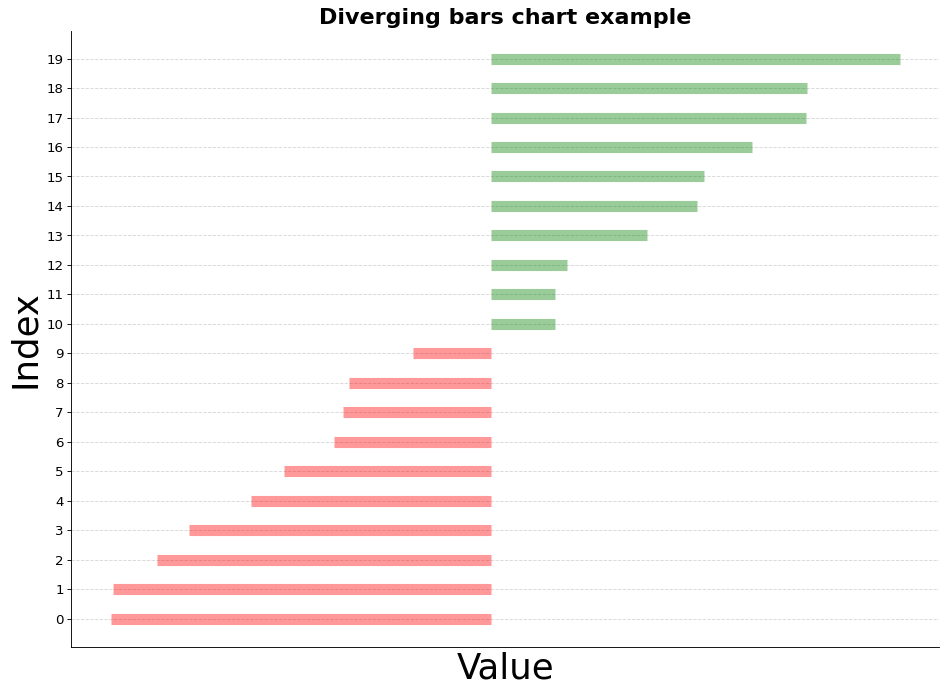

In [16]:
# aanmaken van data
df = pd.DataFrame({"data":np.random.random(size=20)*30+5}) # create random dataframe between 5 and 35
df.sort_values("data", inplace = True) # sorteer by value
df.reset_index(inplace=True) # reset index to ensure index not sorted
df

plt.figure(figsize=(14,10), dpi=80) # dots per inch -> printen -> hoe hoog is de resolutie
colors = ['red' if float(x) < 20 else 'green' for x in df.data]
plt.hlines(y=df.index, xmin=20, xmax=df.data, linewidth=10, color=colors, alpha=0.4) # alpha zet je de transparancy

plt.title('Diverging bars chart example', fontdict={'size':20, 'weight':'bold'}) # fontdict is herbruikbaar dus goed voor zaken die veel gebruikt worden
plt.gca().set_xlabel('Value', fontsize=32) # gca -> get current axis
plt.gca().set_ylabel('Index', fontsize=32)

# verwijder ticks op x-as en op y-as per 1
plt.xticks([])
plt.yticks(df.index, df.index, fontsize=12)

# enkel horizontale stippellijntjes
plt.grid(linestyle='--', alpha=0.5)

# boven en rechterrand weg
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Bar diverging stacked

Je kan ook verschillende balken op dezelfde figuur plaatsen.
Maak nu door gebruik te maken van de barh functie onderstaande figuur zo goed mogelijk na.

![Oef2](./images/plot2.png)

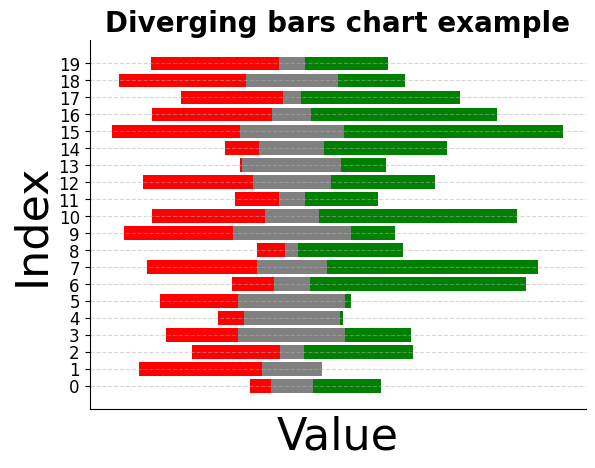

In [26]:
df = pd.DataFrame({"positive":np.random.randint(0,100, size=20),
                  "neutral": np.random.randint(0,50, size=20),
                  "negative": np.random.randint(0,50, size=20)}) # create random dataframe
df

# dit tekent het boven elkaaar
#plt.barh(df.index, df.negative, color='red')
#plt.barh(df.index, df.positive, color='green')
#plt.barh(df.index, df.neutral, color='gray')

plt.barh(df.index, -df.negative, left=-df.neutral/2, color='red')
plt.barh(df.index, df.neutral, left=-df.neutral/2, color='gray')
plt.barh(df.index, df.positive, left=df.neutral/2, color='green')

plt.title('Diverging bars chart example', fontdict={'size':20, 'weight':'bold'}) # fontdict is herbruikbaar dus goed voor zaken die veel gebruikt worden
plt.gca().set_xlabel('Value', fontsize=32) # gca -> get current axis
plt.gca().set_ylabel('Index', fontsize=32)

# verwijder ticks op x-as en op y-as per 1
plt.xticks([])
plt.yticks(df.index, df.index, fontsize=12)

# enkel horizontale stippellijntjes
plt.grid(linestyle='--', alpha=0.5)

# boven en rechterrand weg
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Line Surplus Deficit Filled

Ook is het mogelijk om gebieden op te vullen met de **fill_between functie**.

Maak door gebruik te maken van bovenstaande functie, onderstaande figuur zo goed mogelijk na.

![plot3](./images/plot3.png)

Tips: 
* subplots
* fill_between

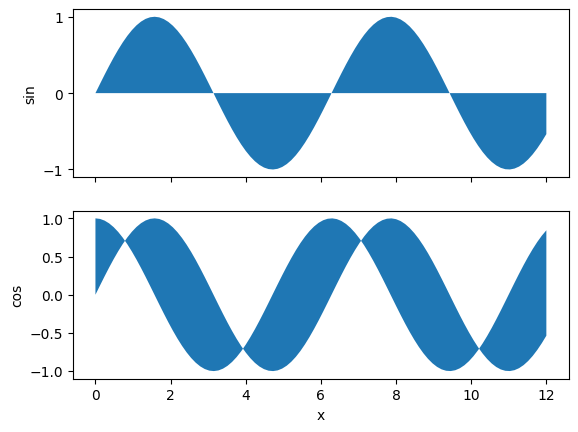

In [34]:
df = pd.DataFrame({"x": np.linspace(0, 12, 100)})
df["sin"] = np.sin(df.x)
df["cos"] = np.cos(df.x)
df

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True) # met sharex wordt de x-as van het onderste gedeeld met het bovenste

# ax1.fill_between(x, y1, y2) het gebied tussen y1 en y2 wordt opgevuld
ax1.fill_between(df.x, 0, df.sin)
ax1.set_ylabel('sin')
ax1.set_yticks([-1, 0, 1])

ax2.fill_between(df.x, df.cos, df.sin)
ax2.set_ylabel('cos')
ax2.set_xlabel('x')

fig.savefig('plot3.png')

## Verband tussen features

### Scatter plot

Reeds veel gedaan dus ga ik hier niet opnieuw tonen

### Line Column Plot

Nu gaan we kijken om te werken met twee assenstelsels.
Dit kan je doen door gebruik te maken van de **twinx()** functie. Zo krijg je een links en rechtse y-as die elk een aparte schaal kunnen hebben.
Maak hiervoor onderstaande figuur zo goed mogelijk na.

![plot4 - line column plot](./images/plot4.png)

Text(0, 0.5, 'Square')

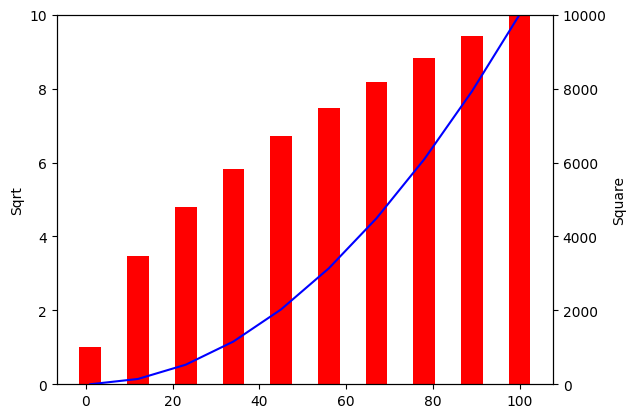

In [37]:
df = pd.DataFrame({"x": np.linspace(1, 100, 10)})
df["square"] = df.x * df.x
df["sqrt"] = np.sqrt(df.x)
df

plt.figure()  
plt.ylim(0.0, 10.0)
plt.bar(df.x, df.sqrt, 5, color='red')
plt.ylabel('Sqrt')

axes2 = plt.twinx() # voor de tweede y-as aan de rechterkant
axes2.plot(df.x, df.square, color='blue', label='square')
axes2.set_ylim(0,10000)
axes2.set_ylabel('Square')

### Connected scatter plot

Om een geconnecteede scatter plot te maken zijn er twee paden die je kan volgen.
* Ofwel zorg je ervoor dat je zowel een line plot als een scatter plot tekend waardoor de punten aangegeven worden. Let op dat hierbij de data in de juiste volgorde moet staan
* Ofwel gebruik je markers in de line-plot om de datapunten aan te geven. Zie [hier](https://matplotlib.org/stable/api/markers_api.html) voor meer info

Kies een methode en maak onderstaande figuur zo goed mogelijk na

![connected scatter plot](./images/plot5.png)

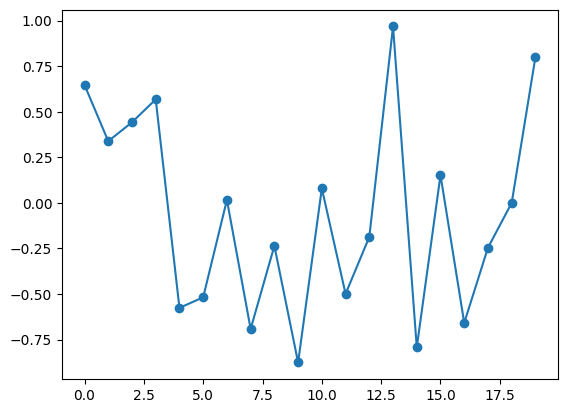

In [38]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y"] = np.random.random(size=20) * 2 -1
df 

plt.figure()
plt.scatter(df.x, df.y) # dit is voor de bolletjes
plt.plot(df.x, df.y) # dis is voor de lijntjes tussen de bolletjes

### Bubble plot

Een bubble plot kan je maken door de **size** parameter van een scatter plot te laten afhangen van een aparte rij.

Oefen dit door deze figuur zo goed mogelijk na te maken:

![bubble plot](./images/plot6.png)

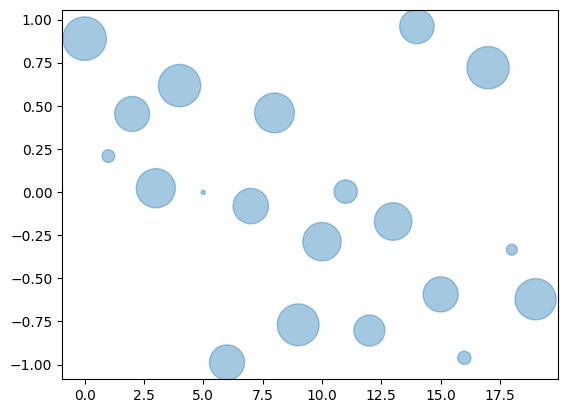

In [43]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y"] = np.random.random(size=20) * 2 -1
df["size"] = np.random.random(size=20) * 1000
df

#plt.scatter(df.x, df.y, s=df.size, alpha=0.4) dit werkt niet
plt.scatter('x', 'y', s='size', alpha=0.4, data=df)


### XY - heatmap

Dit hebben we ook reeds gedaan bij de correlatie matrices, die ga ik nu niet overdoen. Binnen maptlotlib kan dit met matshow. Seaborn heeft een alternatief dat [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) noemt.

## Plots voor verbanden met de tijd

### (Stacked) Area plot

Met behulp van de stackplot functie kan je verschillende plots boven elkaar leggen.
Oefen dit door onderstaande figuur zo goed mogelijk na te bouwen

![plot 7](./images/plot7.png)

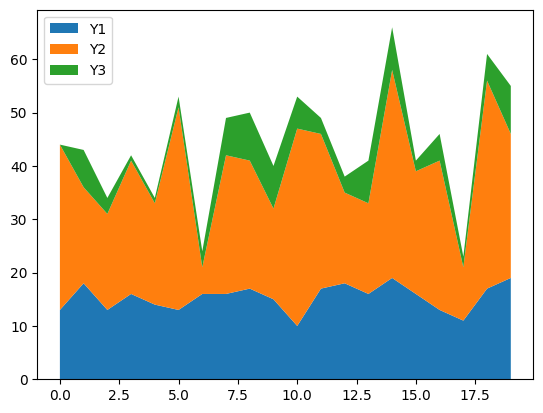

In [47]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y1"] = np.random.randint(10, 20, size=20)
df["y2"] = np.random.randint(5, 40, size=20)
df["y3"] = np.random.randint(0, 10, size=20)
df

plt.stackplot(df.x, df.y1, df.y2, df.y3, labels=['Y1', 'Y2', 'Y3'])
plt.legend(loc='upper left')

### Fan plot

Een andere belangrijke plot is een fan plot. Deze kan bijvoorbeeld gebruikt worden om fouten op voorspellingen aan te geven.
Hiervoor moet er vanaf een bepaald punt (het punt waarop de voorspellingen beginnen) een area opgevuld worden om de mogelijke fout aan te geven.

Om dit in te oefenen, maak onderstaande figuur na
De meeste functies hiervoor heb je reeds gezien. Enkel voor de grijze zone na te bootsen kan je gebruik maken van axvspan()

![plot 8](./images/plot8.png)

,x,y
0,0,45
1,1,51
2,2,30
3,3,88
4,4,75
5,5,25
6,6,94
7,7,12
8,8,13
9,9,41


,x,y,error_1,error_2,error_3
40,40,76,0.0,0.0,0.0
41,41,18,1.0,2.5,3.5
42,42,13,2.0,5.0,7.0
43,43,18,3.0,7.5,10.5
44,44,93,4.0,10.0,14.0
45,45,63,5.0,12.5,17.5
46,46,19,6.0,15.0,21.0
47,47,13,7.0,17.5,24.5
48,48,19,8.0,20.0,28.0
49,49,37,9.0,22.5,31.5


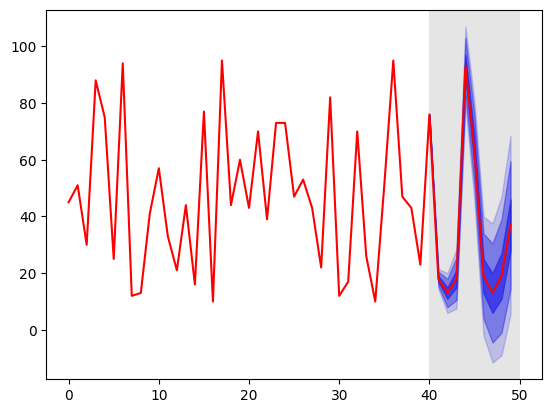

In [49]:
df = pd.DataFrame({"x": np.arange(0, 50)})
df["y"] = np.random.randint(10, 100, size=50)
df_errors = df.tail(10).copy()
df_errors["error_1"] = 50 * 0.2 * (df_errors.x-df_errors.x.min()) / len(df_errors)
df_errors["error_2"] = 50 * 0.5 * (df_errors.x-df_errors.x.min()) / len(df_errors)
df_errors["error_3"] = 50 * 0.7 * (df_errors.x-df_errors.x.min()) / len(df_errors)
display(df)
display(df_errors)


plt.figure()
plt.plot(df.x, df.y, color='red') # Plot the original signal (de rode lijn)

plt.gca().fill_between(df_errors.x, df_errors.y + df_errors.error_1, df_errors.y - df_errors.error_1, color='blue', alpha=0.6)
plt.gca().fill_between(df_errors.x, df_errors.y + df_errors.error_2, df_errors.y - df_errors.error_2, color='blue', alpha=0.4)
plt.gca().fill_between(df_errors.x, df_errors.y + df_errors.error_3, df_errors.y - df_errors.error_3, color='blue', alpha=0.2)

plt.gca().axvspan(40, 50, facecolor='gray', alpha=0.2)	# grijs rechthoekje tekenen

### Circles Timeline Plot

Dit kan gegenereerd worden door middel van een scatter plot waar de x-as de tijd is (of een index), de y waarde is een constante (bijvoorbeeld 0) en de bubble size is dan de bijhorende waarde

Probeer dit zelf eens uit met onderstaande data om deze figuur zo goed mogelijk na te maken

![plot 9](./images/plot9.png)

,x,y1,y2
0,0,1476.421708,1654.672079
1,1,1250.275468,632.952381
2,2,727.215554,1855.914551
3,3,1108.183355,87.733461
4,4,646.807764,440.457248
5,5,1412.594738,467.441503
6,6,1054.783990,659.011965
7,7,1042.516871,1639.695014
8,8,774.151883,250.059085
9,9,1445.092331,1978.968289


(0.0, 3.0)

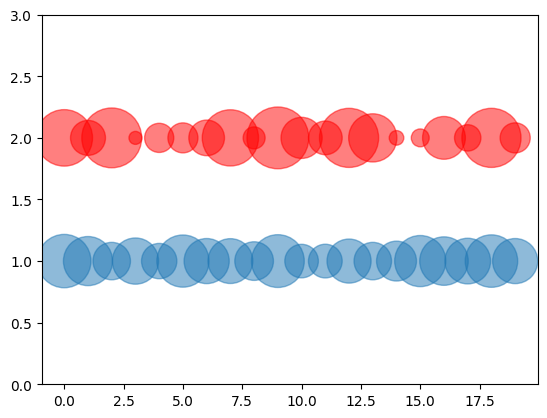

In [50]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y1"] = np.random.random(size=20) * 1000 +500
df["y2"] = np.random.random(size=20) * 2000 +0
display(df)

plt.scatter("x", y=[1] * len(df.y1), s = "y1", alpha=0.5, data=df)
plt.scatter("x", y=[2] * len(df.y1), s = "y2", alpha=0.5, data=df, color="red")
plt.gca().set_ylim(0,3)

### Seismogram plot

Dit kan opnieuw gedaan worden op basis van de vorige voorbeelden. Zoals bij het Connected scatter plot er twee zaken geplot zijn op 1 figuur met dezelfde y-as moeten er hier twee lijn plots zijn. De ene bevat de exacte waarden en de andere een lijn dat de toppen van de golven verbindt. 

Het moeilijke is om de lokale maxima/minima te zoeken die verbonden moet worden. Dit kan eventueel zelf gedaan worden of je kan gebruik maken van een package die dit doet voor jou, bijvoorbeeld: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html of https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

## Sorteren / Volgorde van data

### Lollipop chart

Hiervoor kan je de stem functie gebruiken. Meer informatie over deze functie kan je vinden op [deze website](https://www.python-graph-gallery.com/lollipop-plot/)
Deze kan je inoefenen door onderstaande figuur na te bootsen

![plot 10](./images/plot10.png)

,x,y
0,0,0.418437
1,1,0.520020
2,2,0.968455
3,3,0.179279
4,4,0.198531
5,5,0.409590
6,6,0.296777
7,7,0.951954
8,8,0.347962
9,9,0.233956


<StemContainer object of 3 artists>

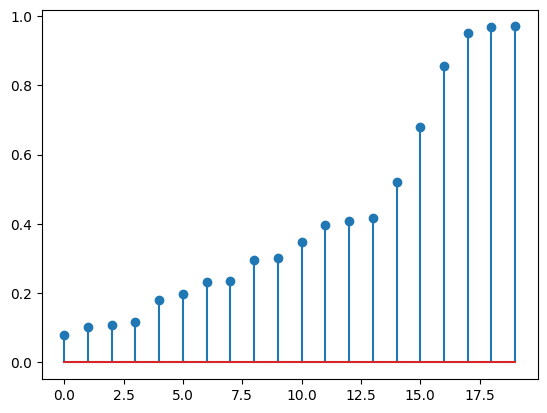

In [51]:
df = pd.DataFrame({'x':range(20), 'y':np.random.uniform(size=20) })
ordered_df = df.sort_values(by='y')
ordered_df.reset_index(inplace=True)
display(df)

plt.stem(ordered_df['y']) # een alternatief is een combinatie van scatter plot en line plots

### Dashboards - Plotly express

Plotly Express is een eenvoudige, krachtige Python bibliotheek om interactieve grafieken te maken met weinig code. Het is gebouwd bovenop Plotly en werkt heel goed binnen Jupyter Notebooks.

**Waarom Plotly Express?**

* Interactief: zoom, hover, legend filters, tooltips automatisch inbegrepen.
* Makkelijk te gebruiken API: vaak 1 regel code per grafiek.
* Ondersteunt veel grafiektypes: line, bar, scatter, pie, histogram, boxplot, enz.
* Werkt inline in Jupyter notebooks zonder extra configuratie.

**Installatie**

In [ ]:
!pip install plotly

**Demo code met Plotly Express**
Hieronder enkele voorbeelden om te starten.

1. Lijnplot (line plot)

/tmp/ipykernel_71/1732581675.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2024-01', periods=12, freq='M')


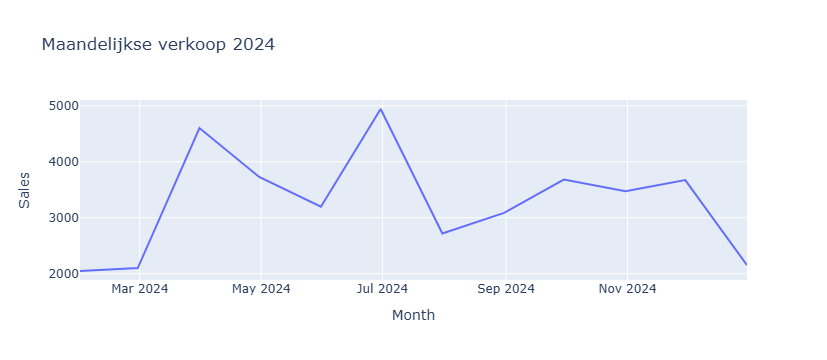

In [52]:
import plotly.express as px
import pandas as pd
import numpy as np

# Voorbeelddata: maandelijkse verkoop
months = pd.date_range(start='2024-01', periods=12, freq='M')
sales = np.random.randint(2000, 5000, size=12)
df = pd.DataFrame({'Month': months, 'Sales': sales})

fig = px.line(df, x='Month', y='Sales', title='Maandelijkse verkoop 2024')
fig.show()

2. Staafdiagram (bar chart)

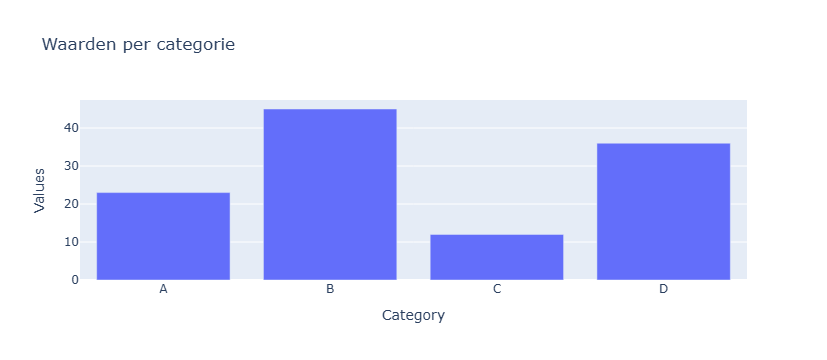

In [53]:
df_cat = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [23, 45, 12, 36]
})

fig = px.bar(df_cat, x='Category', y='Values', title='Waarden per categorie')
fig.show()

3. Scatterplot met kleur en grootte

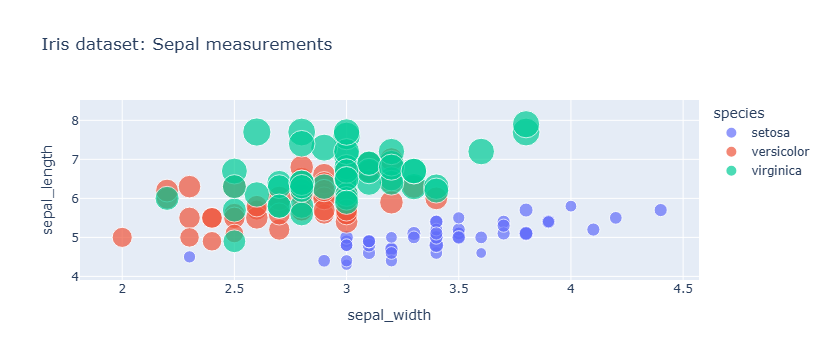

In [58]:
df_scatter = px.data.iris()

fig = px.scatter(df_scatter, x='sepal_width', y='sepal_length',
                 color='species', size='petal_length',
                 title='Iris dataset: Sepal measurements')

fig.show()

4. Histogram

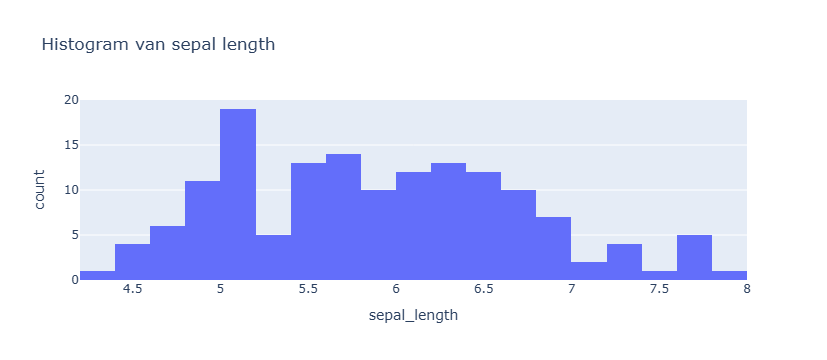

In [62]:
fig = px.histogram(df_scatter, x='sepal_length', nbins=20, title='Histogram van sepal length')
fig.show()

**Oefeningen**

1. Maak een interactieve lijnplot van een zelfgekozen dataset met minstens 2 variabelen. Voeg een titel en labels toe.
2. Maak een staafdiagram dat een categorische variabele vergelijkt met een numerieke variabele uit een dataset.
3. Gebruik de Iris dataset (px.data.iris()) en maak een scatterplot waarbij je de punten kleurt op basis van de soort (species) en de grootte aanpast op basis van een andere kolom.
4. Maak een boxplot met Plotly Express om de spreiding van een numerieke variabele binnen verschillende categorieën te bekijken.
5. Experimenteer met tooltips en verander wat informatie verschijnt als je met de muis over een punt gaat (hint: hover_data argument).

### Dashboards - Streamlit

Streamlit is een populaire open-source Python bibliotheek waarmee je snel interactieve webapplicaties en dashboards bouwt, speciaal gericht op data science en machine learning projecten.

**Waarom Streamlit?**

* Geen front-end kennis nodig (zoals HTML, CSS, JavaScript).
* Zeer eenvoudige en intuïtieve API.
* Real-time updates bij codewijzigingen (hot-reload).
* Geschikt voor het delen van data visualisaties en modellen als een interactieve webapp.

**Installatie**
In je command line (of Jupyter terminal) installeer je Streamlit met:

In [ ]:
!pip install streamlit

**Hoe werkt Streamlit globaal?**

Om een dashboard te bouwen met streamlit te bouwen doorloop je de volgende stappen:
* Je schrijft een Python script (bv. app.py) waarin je met Streamlit functies een UI bouwt: teksten, sliders, knoppen, grafieken, tabellen, enz. Het script kan in een code-cell staan in een notebook en met de %%file cell-magic tag weggeschreven naar een file.
* Start het dashboard met het streamlit cli-commando.
* Streamlit toont je app als een lokale webpagina (http://localhost:8501) waarin gebruikers kunnen interacteren met je data of model.
* Veranderingen in het script herladen de pagina automatisch.
* Veelgebruikte functies: st.write(), st.line_chart(), st.sidebar.slider(), st.selectbox(), st.button(), enz.

**Demo code: Eenvoudige Streamlit app**

In [63]:
%%file app.py
# door de %%file hierboven wordt de code in deze cell in een bestand gezet
import streamlit as st
import pandas as pd
import numpy as np

st.title('Tweede Streamlit Dashboard')

# Een slider in de sidebar
num_points = st.sidebar.slider('Aantal punten', min_value=10, max_value=1000, value=100)

# Data genereren
data = pd.DataFrame({
    'x': np.arange(num_points),  # aantal punten aangepast als je de slider aanpast
    'y': np.random.randn(num_points).cumsum()
})

# Toon een lijnplot
st.line_chart(data.set_index('x'))

# Checkbox om tabel te tonen
if st.checkbox('Toon ruwe data'):
    st.write(data)

# Selectbox voor opties
optie = st.selectbox('Kies een kleur', ['Rood', 'Groen', 'Blauw'])
st.write(f'Je koos: {optie}')

Writing app.py


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.18.0.2:8501
  External URL: http://94.224.100.200:8501



**Wat kan je met Streamlit nog meer?**

* Interactieve widgets: sliders, selecties, tekstinvoer, knoppen, bestandsupload.
* Ingebouwde visualisaties: charts, kaarten, afbeeldingen.
* Integratie met Plotly, Matplotlib, Altair, Bokeh, enz.
* Layouts maken met kolommen en tabs.
* Connecties maken naar databases of API’s.

**Oefeningen**
In de volgende oefeningen ga je gebruik maken van de iris dataset die je kan vinden via de volgende link: https://www.kaggle.com/datasets/uciml/iris
1. Basis scatterplot

* Doel: Visualiseer de relatie tussen sepal_length en sepal_width.
* Maak een scatterplot waarbij de punten gekleurd zijn op basis van de species.
* Voeg labels toe aan de assen en een titel.

2. Histogram per variabele

* Doel: Bekijk de verdeling van elke numerieke variabele.
* Maak voor elke van de vier kenmerken (sepal_length, sepal_width, petal_length, petal_width) een histogram.
* Gebruik subplots om alle histogrammen in één figuur te tonen.

3. Boxplot per soort

* Doel: Vergelijk de spreiding van petal_length tussen de verschillende soorten.
* Maak een boxplot waarbij de x-as de species is en de y-as de petal_length.

4. Pairplot (scatter matrix)

* Doel: Visualiseer relaties tussen alle kenmerken.
* Maak een pairplot waarbij je per paar kenmerken een scatterplot toont, gekleurd op species.

5. Gemiddelden per soort visualiseren

* Doel: Toon samenvattende statistieken in een staafdiagram.
* Bereken per soort het gemiddelde van sepal_length.
* Visualiseer deze gemiddelden in een staafdiagram.

In [ ]:
%%file oefeningen.py
